# 시작하기 전에

---

이전에 학습한 내용들로는 훈련데이터를 받으면 그것을 기반으로 샘플을 받아서 진행하였다. 만일 데이터를 계속해서 받는다면 용량에 대한 부담은 커질 것이다.

훈렌 데이터가 한번에 준비되는 것이 아니라 조금씩 전달된다면, 데이터가 쌓일 때까지 기다릴 수 없다.

기존의 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 훈련한다면? 용량에 대한 부담이 커진다.

또 다른 방법은 새로운 데이터를 추가할 때 이전 데이터를 버림으로써 훈련 데이터 크기를 일정하게 유지하는 것이다. 이렇게 하면 데이터셋의 크기가 너무 커지지 않을 수 있다.

그러나 데이터를 버릴 때 다른 데이터에 없는 중요한 데이터가 포함되어 있다면 치명적일 수 있다.

따라서 이전에 훈련한 모델을 머리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식이 현 시점에서 가장 괜찮은 방법이다. 이렇게 할 수 있다면 훈련에 사용한 데이터를 모두 유지할 필요가 없기 때문이다.

위의 마지막에서 언급한 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 방식을 점진적 학습 또는 온라인 학습이라 부른다. 대표적인 점진적 학습 알고리즘은 ***확률적 경사 하강법(Stochastic Gradient Descent)***이다.

물론 사이킷런에서도 확률적 경사 하강법을 위한 클래스를 제공한다. 확률적 경사 하강법을 사용하기 전에 어떤 알고리즘인지, 또 왜 중요한지에 대해서 알아보자.

# 확률적 경사 하강법(Stochastic Gradient Descent)

---

확률적 경사 하강법에서 확률적이라는 말은 '무작위하게' 혹은 '랜덤하게'의 기술적인 표현이다.

그 다음 '경사'는 기울기에 관한 것이고, '하강법'은 내려가는 방식이다. 다시 말해 경사 하강법은 기울이에 따른 내려가는 방식을 말한다.

$y = x^2$
위와 같이 변곡점을 가지는 경우에는 x의 범위를 얼마나 잡느냐에 따라서 내려가는지 올라가는지 정확하게 알 수 없다.

따라서 경사 하강법에서는 가장 가파를 길을 찾아 내려오지만 조금씩 내려오는 것이 중요하다.


---

***확률적***이라는 말을 이해할 차례이다. 경사 하강법으로 내려올 때 가장 가파른 길을 찾는 방법은 훈련 세트를 사용하기 떄문에 경사 하강법도 가장 가파른 길을 찾을 것이다. 그런데 전체 샘플을 사용하지 않고 딱 하나의 샘플을 훈련세트에서 랜덤하게 골라 가장 가파른 길을 찾는다 이처럼 훈련 세트에서 랜덤하게 하나의 샘플을 고르는 것이 바로! ***확률적 경사 하강법***이다!

## 부가

---

확률적 경사 하강법은 훈련 세트에서 랜덤하게 하나의 샘플을 선택하여 가파른 경사를 조금 내려간다. 그다음 훈련 세트에서 랜덤하게 또 다른 샘플을 하나 선택하여 경사를 조금 내려간다. 이런 식으로 전체 샘플을 모두 사용할 때까지 계속한다.

만일 전체 샘플을 모두 사용하였지만 다 내려오지 않았다면 다시 처음부터 돌린다.

훈련 세트에 모든 샘플을 다시 채워 넣고 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려간다. 이렇게 만족할만한 위치에 도달할 때까지 계속 내려간다. 확률적 경사 하강법에서 훈련세트를 한 번 모두 사용하는 과정을 ***에포크(epoch)***라고 부른다. 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행한다.

무작위로 한 개의 샘플을 선택해서 경사를 내려가는 것이 아니라 여러 개의 샘플을 사용해서 경사 하강법을 수행하는 방식을 ***미니배치 경사 하강법(minibatch gradient descent)***라 부른다.

극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용할 수도 있다. 이를 ***배치 하강법(batch gradient descent)***이라 부른다.

배치 하강법의 경우에는 가장 안정적인 방법일 수 있지만, 전체 데이터를 사용하는 만큼 컴퓨터 자원을 많이 사용하여서 데이터가 너무 많으면 전체 데이터를 한번에 읽을 수 없을지도 모른다.

따라서 확률적 경사 하강법은 훈련 세트를 사용해서 최적점을 찾는 알고리즘이다. 이 때문에 훈련 데이터가 모두 준비되어 있지 않고 매일매일 업데이트 되어도 학습을 이어나갈 수 있다.

*훈련세트가 추가되면 맨 처음부터 시작하는 것이 아니라 마지막 지점에서 다시 최적점을 향해 내려오기 떄문!*

---

확룰적 경사 하강법을 꼭 사용하는 알고리즘이 있는데 이는 신경망 알고리즘이다. 신경망을 일반적으로 많은 데이터를 사용하기 떄문에 한 번에 모든 데이터를 사용할 수 없다.(batch gradient descent) 또 모델이 매우 복잡하기 떄문에 수학적인 방법으로 해답을 얻기 어렵다.

신경망 모델이 확률적 경사 하강법이나 미니배치 경사 하강법을 사용한다는 점을 기억할것!

# 손실 함수(loss function)

---

위와 같은 확률적 경사 하강법은 어디서 내려가야하는지, 가장 빠른 길을 찾아가려고 하는 이 곡면이 바로 손실 함수 이다.

손실 함수는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다.

그렇다면 손실 함수의 값이 작을수록 좋을 것인데 어떤 값이 최소값인지는 알지 못한다.
가능한 많이 찾아보고 만족할만한 수준이라면 최적점을 찾았다고 인정해야한다. 이 값을 찾아서 조금씩 이동하려면 확률적 경사 하강법이 잘 맞을듯 하다.

다행히 우리가 다루는 많은 문제에 필요한 손실 함수는 이미 정의되어 있다. 그럼 분류를 위해서는 어떤 손실 함수를 사용해야하는지 알아보자.

분류에서 손실은 정답을 못 맞히는 것인데 앞서 배웠던 KNeighborsClassifier 클래스의 경우 주변 최근접 샘플의 갯수에 따라서 predict_proba()메서드를 통해서 확를을 알 수 있었는데 이웃의 갯수가 많지 않아서 0, $\frac{1}{3}$,$\frac{2}{3}$, 1과 같이 확률이 뚝뚝 끊기는 것을 볼 수 있었다.

그러나 확률적 경사 하강법의 경우에는 곡면이 연속적이여야 하는데 불연속이 생겨 미분 불가능한 지점이 생긴다면 안된다.

따라서 연속적인 손실 함수를 만들기 위해서는 로지스틱 회귀 모델과 같은 0 ~ 1사이의 어떤 값도 될 수 있고 연속적인 모델을 사용해야 한다.



## 로지스틱 손실 함수(Logistic loss function)

---

샘플 4개의 예측 확률을 각각 0.9, 0.3, 0.2, 0.8 라고 하고 타깃 클래스는 0, 0, 1, 1이고 예측은가지는 손실 함수를 만들어 보자.


||1번 샘플|2번샘플|3번샘플|4번샘플|
|-||----|---|---|
|예측 확률|0.9|0.3|0.2|0.8|
|예측 결과|1|0|0|1|
|타깃|1|1|0|0|

표를 참고하면 예측확률이 높음에도 불구하고 제대로된 예측을 성공하지 못한 것을 볼 수 있는데 이는 1로 나타날 확률과 같다.


* 첫번째  샘플
    
  첫 번째 샘플의 경우 예측은 0.9이고, 정답(타깃)은 1이므로 둘을 곱하고 음수로 만들면 이를 손실함수로 이용할 수 있다.
  $$0.9 × 1 ×-1 = -0.9$$



* 두번째 샘플

  두 번째 샘플의 경우 예측은 0.3이고, 타깃 클래스는 1이므로 동일한 계산을 적용하면
  
  
  $$0.3 × 1 × -1 = -0.3$$

* 세번째 샘플

  세 번째 샘플의 경우 예측은 0.2인데, 타깃 클래스는 0이다. 이 경우 위 두가지 샘플에 대한 계산을 적용시킬 수 없기 떄문에 1에서 0.2를 빼주고 음수를 곱한다.
  $$(1 - 0.2) × -1 = -0.8$$

* 네번째 샘플

  네 번째 샘플의 경우 타깃 클래스는 0이므로 세 번째 샘플과 같은 계산을 적용한다.
  $$(1 - 0.8) × -1 = -0.2$$

예측 확률을 사용해서 위와 같은 방식을 사용하면 연속적인 손실함수를 얻을 수 있다.

여기에서 예측확률에 로그 함수를 적용하면 더 좋다. 예측확률의 범위는 0~1사이인데 로그 함수는 이 사이에서 음수가 되므로 최종 손실 값은 양수가 되기 때문이다. 손실이 양수가 되면 이해하기 더 쉬움.

또한 로그 함수는 0에 가까울수록 아주 큰 음수가 되기 떄문에 손실을 아주 크게 만들어 모델에 큰 영향을 미칠 수 있다.





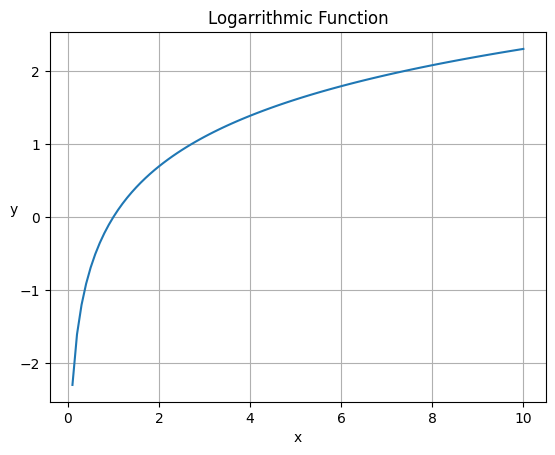

In [25]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.1, 10, 100)

y = np.log(x)

plt.plot(x, y)

plt.xlabel('x')
plt.ylabel('y', rotation = 0)

plt.title("Logarrithmic Function")
plt.grid()
plt.show()

양성 클래스(타깃 = 1)일 때 손실은 $-log(predict\_proba)$로 계산하고

음성 클래스(타깃 = 0)일 떄 손실은 $-log(1 - predict\_proba)$로 계산한다.

이 예측 확률이 0에서 멀어질수록 손실은 아주 큰 양수가 된다.(손실은 적을 수록 좋음)

방금 정의한 손실함수를
***로지스틱 손실함수(Logistic loss function)***이라고 부른다.

또는 ***이진 크로스엔트로피 손실 함수(binary cross-entropy loss function)***라고도 부른다.

로지스틱 손실함수를 사용하면 로지스틱 회귀 모델이 만들어진다!


위 예시에서는 이진 분류에 대한 예시를 손실함수로 나타내보고 그것이 로지스틱 손실함수라는 사실을 알았다.

다중분류에서도 로지스틱 손실함수와 매우 비슷한 손실함수를 사용하는 손실함수가 있는데 이는 ***크로스엔트로피 손실 함수(cross-entropy loss function)***이라 부른다.

사실 손실 함수를 직접 만드는 일은 거의 없지만 확실한 이해를 위해 학습하는 것이 좋다고 생각한다.

#SGD Classifier(Standard Gradient Descent Classifier)

In [26]:
import pandas as pd

# pandas이용해서 csv파일 불러오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# DataFrame안에 있는 column나눠서 input과 target나누기

#DF.columns를 통해서 column들의 이름을 알 수 있다. (Dtype = obj)

fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish[['Species']].to_numpy()


In [27]:
from sklearn.model_selection import train_test_split

# 전체 input과 target에서 train, test 나누기
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [28]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 클래스를 이용해서 스케일 조정해주기
ss = StandardScaler()

ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

데이터를 불러오고 정규화 시키는것 까지가 전에 했던 내용이다.

이제부터 사이킷런에서 확률적 경사 하강법을 제공하는 대표적인 분류용 클래스인 SDGClassifier을 sklearn.linear_model 패키지에서 임포트한다.

SDGClassifier클래스에 대한 객체를 만들 때에 3개의 매개변수를 지정할 수 있다.

* 동일한 랜덤 결과가 나오게 하기 위한 random_state
* 손실 함수의 종류를 지정할 loss
* 에포크 횟수를 지정할 max_iter

다중 분류의 경우 SGDClassifier에 loss = 'log'로 지정하면 클래스마다 이진 분류 모델을 만든다. 예를 들어 생선중 도미를 양성 클래스로 두고 나머지를 모두 음성 클래스로 두고 모델을 만드는 방식이다. 이런 방식을 OvR(One versus Rest)라고 부른다.


In [29]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(random_state = 42, loss = 'log', max_iter = 10)

sc = sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


위 코드를 실행하면 ConvergenceWarning 경고가 뜨는데 경고 문구를 해석하면 경사를 다 내려오기 전에 iteraion이 끝났으니, 숫자를 늘리라는 경고가 출력된다.

---

하지만 SGDClaasifier클래스의 경우 점진적인 학습이 가능하기 때문에 다시 객채를 만들어 fit을 하기 보다는 훈련한 모델 sc를 추가로 더 훈련한다. 훈련할 때는 partial_fit() 메서드를 사용하면 된다.

이 메서드는 fit()메서드와 사용법이 같지만 호출할 때마다 1 에포크씩 이어서 훈련할 수 있다.

In [30]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

# for문을 통한 확인

for i in range(10):
  sc.partial_fit(train_scaled, train_target)
  print(sc.score(train_scaled, train_target))

0.8151260504201681
0.85
0.7815126050420168
0.8067226890756303
0.8487394957983193
0.8571428571428571
0.8487394957983193
0.865546218487395
0.8487394957983193
0.8571428571428571
0.8487394957983193
0.8487394957983193


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

실행할 때마다 추가로 훈련하기 때문에 score이 계속 바뀐다.

---

한번 partial_fit을 할 때 여러 샘플을 넣어서 경사하강을 진행하기 때문에 배치나 미니배치 하강법이 아니냐고 생각할 수 있지만 SGDClassifier클래스는 훈련 세트에서 1개씩 샘플을 꺼내서 경사 하강법을 진행하고 미니배치나 배치 사강법은 제공하지 않는다. 추후에 신경망을 통해서 사용할 예정

# 에포크와 과대 / 과소적합

---

3장에서 배웠던 과소적합과 과대적합은 경사 하강법의 에포크의 횟수에 따라서 나타날 수 있다.

에포크 횟수가 적으면 경사를 다 내려오지 못하고 훈련을 마치기 때문에 과소적합일 일어날 수 있고

에포크 횟수가 너무 많으면 훈련세트에만 맞춰지기 때문에 과대적합이 일어날 수 있다.

따라서 과대적합이 시작하기전에 훈련을 멈추는 것을 ***조기 종료(early stopping)***이라 한다.

이번 모델의 학습에는 오로지 partial_fit()메서드만 사용한다. partial_fit()메서드만 사용하려면 훈련 세트에 있는 전체 클래스의 레이블을 partial_fit메서드에 전달해주어야 한다.

* partial_fit 메서드는 데이터의 일부분만 주어진다고 가정하기 때문에 fit을 사용하지 않고 partial_fit만 사용하는 경우에는 클래스들을 다 명시해주어야 한다.

이를 위해서 np.unique() 함수로 train_target에 있는 7개 생선의 리스트를 만들고 에포크마다 훈련 세트와 테스트 세트에 대한 점수를 기록하기 위해 2개의 리스트를 준비한다.

In [42]:
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sc = SGDClassifier(random_state = 42, loss = 'log')

train_score = []
test_score = []

classes = np.unique(train_target)

#for문을 사용하여 경사 하강법 실행

for i in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes = classes)

  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

warnings.filterwarnings("default")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


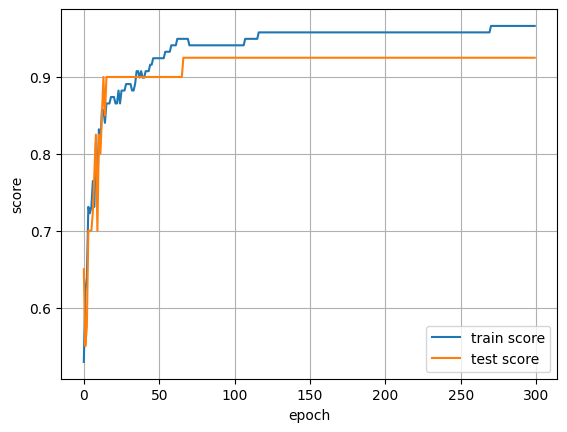

In [44]:
import matplotlib.pyplot as plt
plt.plot(train_score, label = 'train score')
plt.plot(test_score, label = 'test score')

plt.legend()

plt.xlabel("epoch")
plt.ylabel("score")
plt.grid()

plt.show()

위 결과를 확인해보면 테스트세트의 정확도는 75회정도 뒤부터는 꾸준히 유지되는데, 훈련세트의 점수는 약간의 갭이 있는것을 확인할 수 있다. 따라서 과대적합이나 과소적합의 가능성을 줄이기 위해서 훈련세트와 테스트세트의 갭이 가장 적은 100회로 max_iter을 설정하고 진행한다.

---

SGDClassifier클래스에는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.  tol이라는 매개변수는 향상될 최솟값을 정하는데 None으로 설정한다면 자동으로 멈추지 않고 무조건 max_iter에 도달할때까지 반복한다.

In [45]:
sc = SGDClassifier(max_iter = 100, tol = None, loss = 'log', random_state = 42)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))

print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## SGDClassifier의 loss에 대해서

---

loss의 경우 어떤 손실 함수를 사용할 것인지 정하는 것인데, 이번 모델의 학습에는 로지스틱 손실 함수를 사용하였지만 사실 loss의 매개변수의 기본값은 'hinge'이다.

***힌지 손실(hinge loss)***은 ***서포트 벡터 머신(support vertor machine)이라 불리는 또 다른 머신러닝 알고리즘을 위한 손실 함수이다. 여기에서는 힌지 손실과 서포트 벡터 손실에 대해 더 자세히 다루지 않는다. 하지만 서포트 벡터 머신이 널리 사용하는 머신러닝 알고리즘 중 하나라는 점과 SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다는 것만 기억하자.

In [46]:
# 힌지 로스를 사용한 모델 훈련

sc = SGDClassifier(loss = 'hinge', max_iter = 100, random_state = 42, tol = None)

sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.9495798319327731
0.925


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 고찰

---

이번 학습에서는 데이터의 크기가 커지면 발생할 수 있는 문제에 대해서 다뤘다. 데이터가 계속 들어오는데 크기를 감당할 수 없게 되면 미리 훈련해둔 모델에 추가적으로 훈련을 진행하는 점진적 학습 또는 온라인 학습을 통해서 그 문제를 해결하였다.

확률적 경사 하강법을 이용하였는데, 하나의 샘플을 이용해서 경사를 내려오는 것이였다. 훈련 세트에 있는 데이터를 다 넣어도 최적점을 찾지 못한다면 다시 처음부터 샘플을 집어 넣는데 그 전에 내려오던 과정은 그대로 남겨두고 다시 진행한다. 이 데이터를 전부 사용한 상태를 에포크라고 한다.

여기에서 이 경사는 손실 함수의 곡면이다. 손실 함수는 얼마나 엉터리인지 나타내는데 당연히 낮을 수록 좋다.
따라서 확룰적 경사 하강법은 에포크의 숫자를 늘리면서 손실이 가장 적은 점을 찾아서 내려가는 것이다.

손실 함수중에서 로지스틱 손실 함수를 이용하여서 진행하였다.

sklearn.linear_model에 있는 SGDClassifier 클래스를 통해서 이 과정을 진행하였는데

max_iter 매개변수를 통해서 에포크의 숫자를 정해서 훈련을 진행할 수 있었다.

에포크의 숫자에 따라서 과대적합이나 과소적합의 가능성이 있었다. 따라서 조기종료를 통해 해결할 수 있었다.

partial_fit()메서드를 통해서 점진적으로 학습시키는데, fit을 사용하지 않고 최적의 에포크 값을 찾아냈다.

이번 확률적 경사 하강법의 학습에서는 점진적 학습에서 점진적 학습 알고리즘인 확률적 경사 하강법을 다뤘고 그 중에서도 로지스틱 손실 함수를 통해서 모델을 구현하였다.

여러 알고리즘과 손실 함수에 대해서 추후에 더욱더 학습할 예정이다.